In [1]:
import pandas as pd
dataset=pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the Position and Level of the employee. But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model. Hence, Level is our feature or X variable. And, Salary is Label or the Y variable

In [32]:
x=dataset.iloc[:,1:2].values
#x=dataset.iloc[:,1].values
# this is written in this way to make x as a matrix as the machine learning algorithm.
# if we write 'x=dataset.iloc[:,1].values', it will return x as a single-dimensional array which is not desired 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Generally, we divide our dataset into two parts 1) The training dataset to train our model. And, 2) The test dataset to test our prepared model. Here, as the dataset has a limited number of entries, we won't do a split. Instead of that, we'd use direct numerical values to test the model. Hence, the code above is kept commented. But, train test split can also be done, if you desire so:)

To learn Polynomial Regression, we'd follow a comparative approach. First, we'll try to create a Linear Model using Linear Regression and then we'd prepare a Polynomial Regression Model and see how do they compare to each other

In [33]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualising the Linear Regression results

Text(0, 0.5, 'salary')

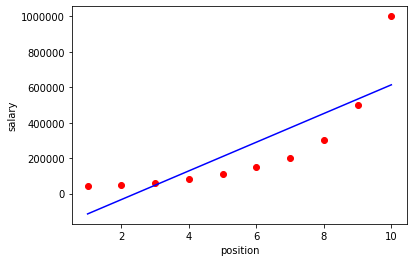

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y,color='red')
plt.plot(x,lr.predict(x),color='blue')
plt.xlabel('position')
plt.ylabel('salary')



Here, the red dots are the actual data points and, the blue straight line is what our model has created. It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model.

In [35]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2) #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
x_poly=pf.fit_transform(x)
print(x_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [36]:
# doing the actual polynomial Regression
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.

Why is it so?
It is because the Linear in Linear Regression does not talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the degree of the coefficients. Mathematically,
𝑦=𝑎+𝑏𝑥+𝑐𝑥2+...+𝑛𝑥𝑛+...
 
It's not talking about the power of x, but the powers of a,b,c etc. And as the coefficients are only of degree 1, hence the name Linear Regression.

Text(0, 0.5, 'salary')

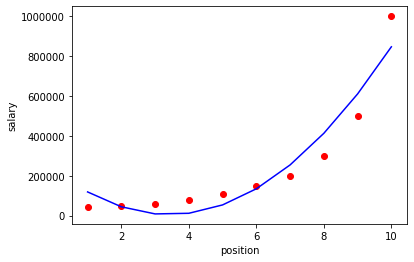

In [28]:
plt.scatter(x,y,color='red')
plt.plot(x,lr.predict(x_poly),color='blue')
plt.xlabel('position')
plt.ylabel('salary')

Still, a two degree equation is also not a good fit. Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not. After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [29]:
pf=PolynomialFeatures(degree=4)
x_poly=pf.fit_transform(x)
print(x_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [30]:
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'salary')

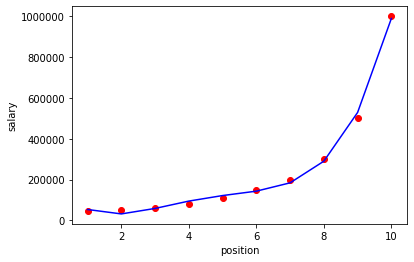

In [31]:
plt.scatter(x,y,color='red')
plt.plot(x,lr.predict(x_poly),color='blue')
plt.xlabel('position')
plt.ylabel('salary')

Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets. we are getting a brilliant fit as the number of datapoints are a few.